<a id='1'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;">2. Color spaces and image processing</p>

### En esta práctica, trabajaremos con los espacios de color RGB y HSV, veremos la diferencia de cada uno de ellos e implementaremos un detector de bordes que probaremos con imágenes en ambos espacios.

### Primero, buscaremos segmentar una imagen a partir de su espacio de  color. Para eso utilizaremos dos funciones de opencv principalmente: "bitwise_and" e "inRange".

In [33]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors

from mpl_toolkits.mplot3d import Axes3D  # noqa
from matplotlib.colors import hsv_to_rgb

### convierte las imágenes de tu dataset al espacio RGB (ojo que openCV trabaja por defecto en BGR)

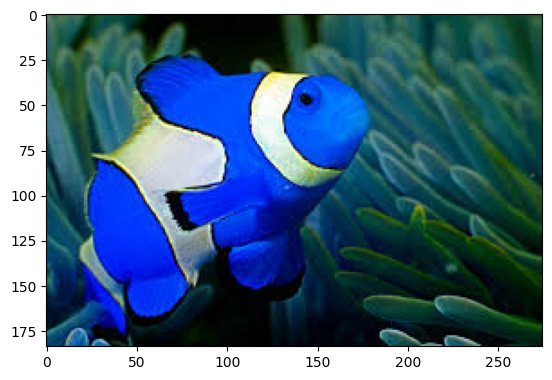

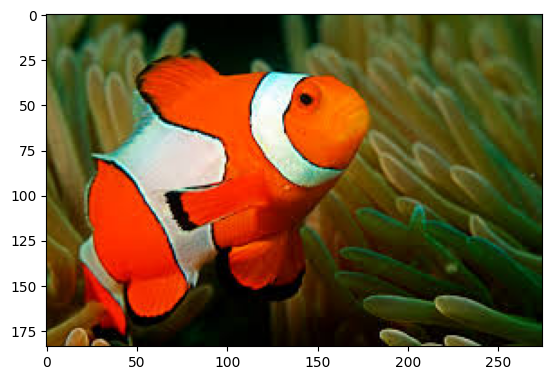

In [34]:
# implementa aquí tu función

plt.show()


### Trabajaremos de momento con la imagen 0 de nuestro dataset. Filtra la imagen entre los dos tonos siguientes de naranja usando las funciones "inRange" y "bitwise_and" de opencv

naranja_claro = (1, 190, 200)

naranja_oscuro = (18, 255, 255)

### Ojo, para poder segmentar la parte de la imagen que está entre estos colores deberás transformarla a un espacio de color donde la crominancia y la intensidad estén separados

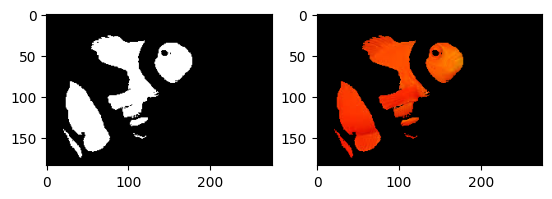

In [41]:
# implementa aquí tu función

### Haz lo mismo pero ahora segmenta solo las lineas blancas de la imagen 0 de nuestro dataset

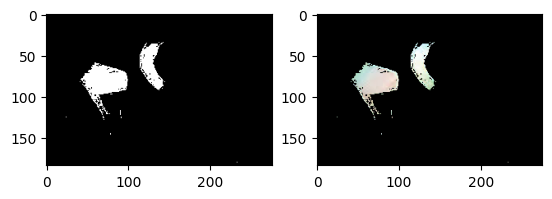

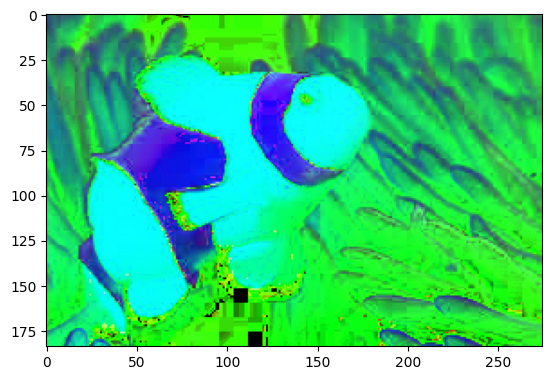

In [43]:
# implementa aquí tu función

### Junta tu implementación y deberías ser capaz de obtener una imagen donde solo se segmente el pez payaso (parte naranja y parte blanca) en tu imagen 0 del dataset. Plotea los resultados

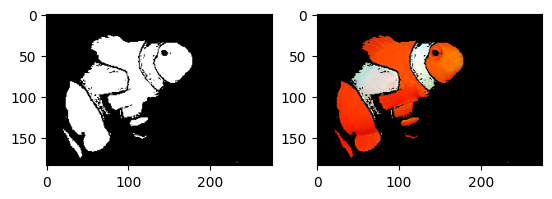

(184, 275)


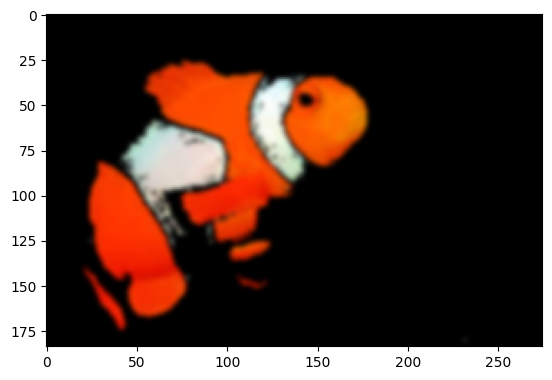

In [44]:
# implementa aquí tu función

### Generaliza tu implementación y aplícala a todas las imágenes del dataset. Pega tus resultados en tu informe.

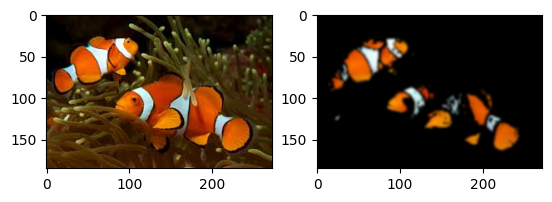

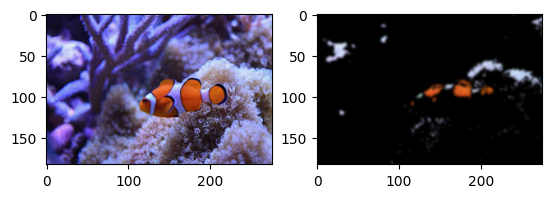

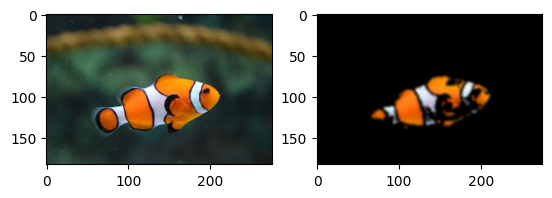

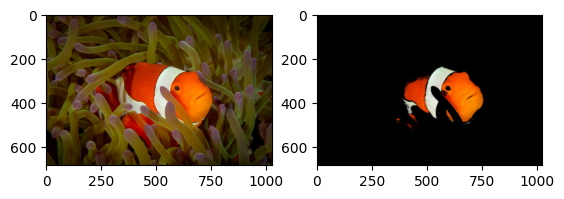

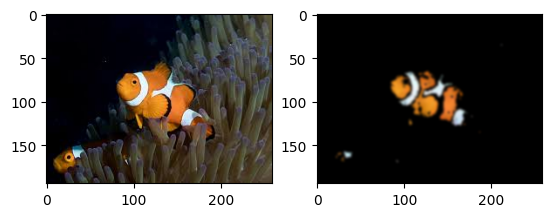

In [18]:
# implementa aquí tu función

## Parte 2: Image processing

### Implementa una función "convolution" con dos entradas: imagen y el kernel. Asume un Kernel 3x3 y 
### aplica padding para que la convolción pueda tener lugar en los pixeles de los extremos

In [19]:
def convolution(image, kernel):
    
    # implementa aquí tu función

### Ahora implementaremos un méotodo de edge detection llamado Sobel. Éste se basa en un filtro derivativo y usaremos el filtro 

filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

### Recuerda por la teoría, que el método Sobel devuelve dos matrices, una de la convolución de la imagen de entrada con el filtro original y otra que es el resultado de aplicar el filtro original traspuesto.

In [41]:
from mpl_toolkits.mplot3d import Axes3D
def sobel_edge_detection(image, filter):
    
   # implementa aquí tu función

    gradient_magnitude *= 255.0 / gradient_magnitude.max()

    return gradient_magnitude
 

### Aplica tu edge detector a la imagen 0 del dataset

(185, 272, 3)
(184, 275)


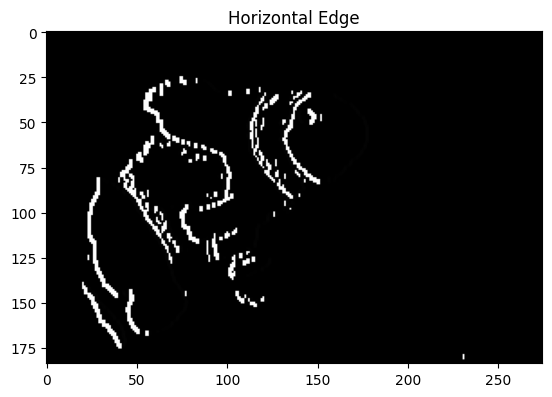

(184, 275)


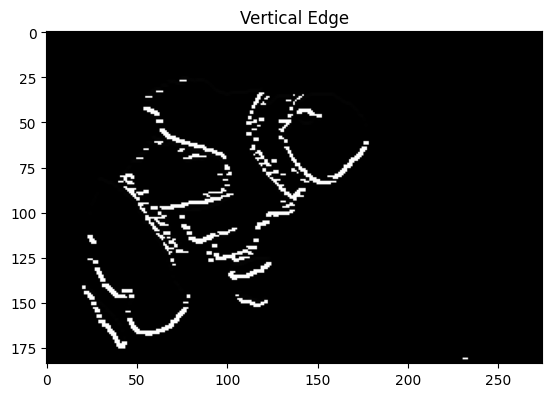

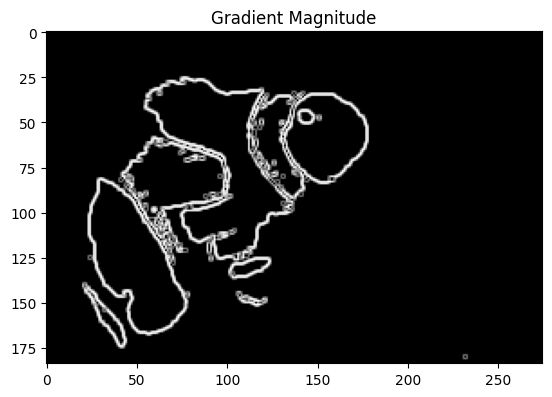

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float16)

In [43]:
# implementa aquí tu función

### Implementa una función que calcule y aplique un filtro gaussiano que sirve para hacer la imagen más blurry. Recuerda la fórmula del filtro Gaussiano visto en teoría. La función debe devolver la imagen filtrada y el filtro calculado.

In [26]:
import numpy as np


def gaussianBlur(img, sigma, filter_shape):
    
    # implementa aquí tu función

    return gaussian_filter, filtered.astype(np.uint8)

### ¡Ojo! el método Sobel aplica un filtro gaussiano para hacer más blurry la imagen antes de aplicar los filtros derivativos. 
### Implementa una nueva función de edge detection con Sobel que tenga en cuenta esto. Ten en cuenta que la gaussiana se aplica sobre la imagen en escala de grises

In [28]:
import numpy as np


def sobelEdgeDetection(image, sigma, image_format, filter_shape):
    img = togray(image, image_format)
    
    # implementa aquí tu función

    G = np.hypot(Ix, Iy) #Ix e Iy: convolución de los filtros por las filas y columnas (derivadas parciales respecto a X e Y)

    G = G / G.max() * 255

    theta = np.arctan2(Iy, Ix)

    return np.squeeze(G), np.squeeze(theta)

In [29]:
import numpy as np


def non_max_suppression(img, theta):
    M, N = img.shape
    Z = np.zeros((M, N), dtype=np.int32)

    # converting radians to degree
    angle = theta * 180. / np.pi    # max -> 180, min -> -180
    angle[angle < 0] += 180         # max -> 180, min -> 0

    for i in range(1, M-1):
        for j in range(1, N-1):
            q = 255
            r = 255

            # angle 0
            if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                r = img[i, j-1]
                q = img[i, j+1]
            # angle 45
            elif (22.5 <= angle[i, j] < 67.5):
                r = img[i-1, j+1]
                q = img[i+1, j-1]
            # angle 90
            elif (67.5 <= angle[i, j] < 112.5):
                r = img[i-1, j]
                q = img[i+1, j]
            # angle 135
            elif (112.5 <= angle[i, j] < 157.5):
                r = img[i+1, j+1]
                q = img[i-1, j-1]

            if (img[i, j] >= q) and (img[i, j] >= r):
                Z[i, j] = img[i, j]
            else:
                Z[i, j] = 0
    return Z

### teniendo en cuenta los algoritmos ya implementados, Implementa un edge detection con el método canny, el cual es una secuencia de:
###     1. Edge detection con Sobel
###     2. El método NMS (non-maximum suppression) para homogeneizar el grosor de los cantos detectados
    
### Aplica tu método Canny a las imágenes de tu dataset

In [30]:
def cannyEdgeDetection(
    image, sigma, filter_shape
):
    # implementa aquí tu función
    img = non_max_suppression(G, theta)
    
    return img

### Aplica la función Canny a la imagen 0 del dataset con un kernel de tamaño 10x10 y sigma de 1.5.

### Juega con estos parámetros hasta encontrar la combinación que detecta los edges mejor. Aplícalo a todo el dataset y rellena el informe con estas pruebas

(184, 275, 3)


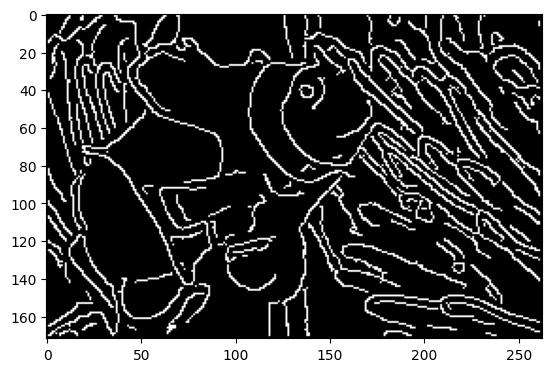

In [38]:
#implementa aquí tu función

### La librería de python skimage tiene ya implementadas las funciones de:
###     - gaussian
###     - sobel filter
    
### Investiga sobre ellas e implementa un filtro gaussiano y un edge detection con sobel usando los paquetes de skimage. Compara los resultados con los ya obtenidos.

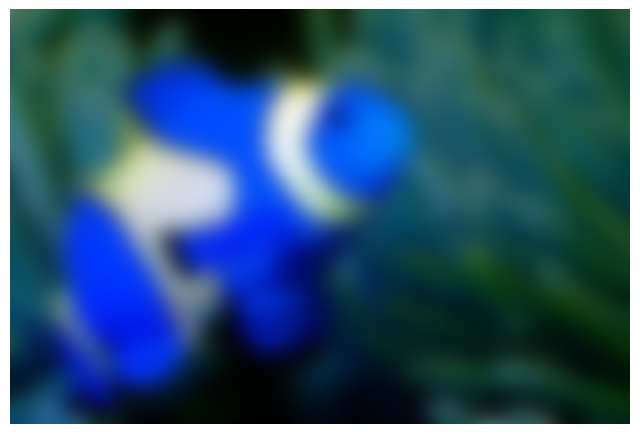

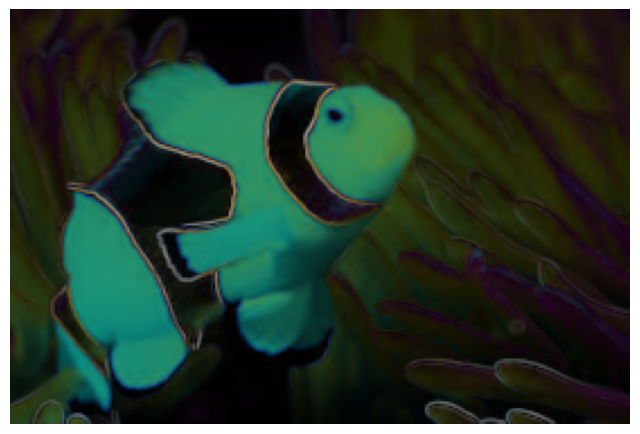

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku


   
    
#implementa aquí tu función

### Implementa los operadores morfológicos: dilation and erosion. Utiliza para ello:

### - La imagen 0 del dataset
### - Un kernel de 3x3 con valores de 255 (blanco) como structuring element

### no olvides binarizar tu imagen antes de aplicar los operadores morfológicos

### Implementa primero la dilatación, muestra los resultados e inclúyelos en el informe

In [ ]:
#implementa aquí tu función

### Implementa ahora la erosión, muestra los resultados e inclúyelos en el informe

In [ ]:
#implementa aquí tu función